# Line Charts

Let's consider the [United States Bureau of Labor Statistics](https://www.bls.gov/) (BLS) that surveys and calculates the monthly unemployment rate. 

The unemployment rate is the percentage of individuals in the labor force without a job. You can read more about how the BLS calculates the unemployment rate [here](https://www.bls.gov/cps/cps_htgm.htm).

The BLS releases monthly unemployment data available for download as an Excel file, with the `.xlsx` file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. From the website of the [Federal Reserve Bank of St. Louis](https://www.stlouisfed.org/) a cvs fromat is available. We have downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as `unrate.csv`.

Let's first read this CSV file into pandas to explore the table representation of this data. The dataset is a `time series` dataset, which means the data points (monthly unemployment rates) are ordered by time. 

In [8]:
import pandas as pd

unrate = pd.read_csv('./data/unrate.csv')
unrate.head()

DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5

In [2]:
unrate.dtypes

DATE      object
VALUE    float64
dtype: object

When we read the dataset into a DataFrame, pandas will set the data type of the `DATE` column as a text column: this column is given a data type of `object`. Therefore, we need to convert this column to the datetime type using the `pandas.to_datetime()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), which returns a Series object with the datetime data type that we can assign back to the DataFrame.

In [9]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.dtypes

DATE     datetime64[ns]
VALUE           float64
dtype: object

In [10]:
# Display the first 12 rows in `unrate`.
print(unrate.head(12))

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


The dataset contains 2 columns:

* `DATE`: date, always the first of the month. Here are some examples:
        1948-01-01: January 1, 1948.
        1948-02-01: February 1, 1948.
        1948-03-01: March 1, 1948.
        1948-12-01: December 1, 1948.
* `VALUE`: the corresponding unemployment rate, in percent.

The first 12 rows reflect the unemployment rate from January 1948 to December 1948.

Visually scan the table and observe how the monthly unemployment rate has changed over time. 

Generate a line chart that visualizes the unemployment rates from 1948:
  *      x-values should be the first `12` values in the `DATE` column
  *      y-values should be the first `12` values in the `VALUE` column
  
Use `unrate[0:12]` or `unrate[:12]` to select the first `12` rows in `unrate`.

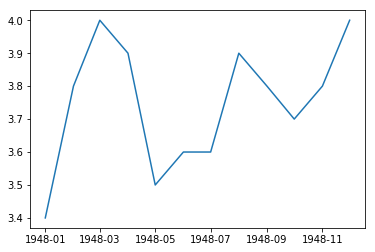

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

first_twelve = unrate[:12]
# Assigned first 12 rows to a variable just for easy reference.
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.show()

While the y-axis looks fine, the x-axis **tick labels** are too close together and are unreadable. 

We can rotate the x-axis tick labels by 90 degrees so they don't overlap. The `xticks()` [function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) within pyplot lets you customize the behavior of the x-axis ticks. 

In the documentation for the function, you'll see a link to the matplotlib `Text` [class](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), which is what pyplot uses to represent the x-axis tick labels. You'll notice that there's a `rotation` parameter that accepts degrees of rotation as a parameter. We can specify degrees of rotation using a float or integer value.

As a side note, if you read the documentation for `pyplot`, you'll notice that many functions for tweaking the x-axis have matching functions for the y-axis. For example, the y-axis counterpart to the `xticks()` function is the `yticks()` [function](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.yticks).

Use what we've discussed so far to rotate the x-axis tick labels by 90 degrees.
* Call the `xticks()` function and set rotation to `90`.

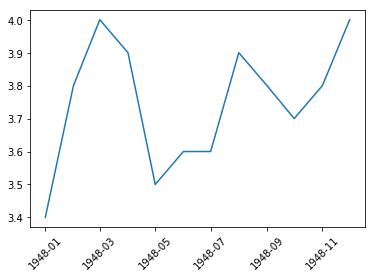

In [13]:
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=45)
plt.show()

Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road.

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

* [`xlabel()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel): accepts a string value, which gets set as the x-axis label.
* [`ylabel()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel): accepts a string value, which is set as the y-axis label.
* [`title()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title): accepts a string value, which is set as the plot title.

* Set the x-axis label to `"Month"`.
* Set the y-axis label to `"Unemployment Rate"`.
* Set the plot title to `"Monthly Unemployment Trends, 1948"`.

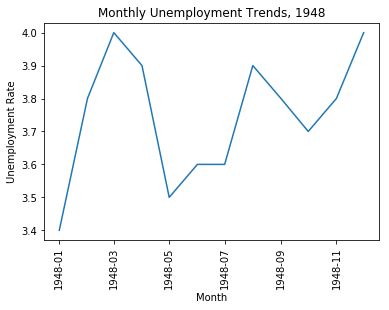

In [14]:
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()